<a href="https://colab.research.google.com/github/Sahilmandalwar/campusx_machine_learning_code/blob/main/ML_030_BaggingEnsembleLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd

In [40]:
from sklearn.datasets import load_iris

In [41]:
import matplotlib.pyplot as plt

In [42]:
iris = load_iris(return_X_y=False)

In [43]:
df = pd.DataFrame(iris.data,columns=iris.feature_names).join(pd.DataFrame(iris.target,columns=['species']))


In [44]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Sampling

In [45]:
df_sampled = df.sample(100)
train_dataset = df_sampled.iloc[:60,:].sample(10)
val_dataset = df_sampled.iloc[60:80,:].sample(5)
test_dataset = df_sampled.iloc[80:,:].sample(5)

In [46]:
X_test = val_dataset.iloc[:,:-1]
y_test = val_dataset.iloc[:,-1]

In [47]:
train_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
59,5.2,2.7,3.9,1.4,1
145,6.7,3.0,5.2,2.3,2
67,5.8,2.7,4.1,1.0,1
63,6.1,2.9,4.7,1.4,1
8,4.4,2.9,1.4,0.2,0
11,4.8,3.4,1.6,0.2,0
22,4.6,3.6,1.0,0.2,0
74,6.4,2.9,4.3,1.3,1
43,5.0,3.5,1.6,0.6,0
17,5.1,3.5,1.4,0.3,0


In [48]:
val_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
146,6.3,2.5,5.0,1.9,2
133,6.3,2.8,5.1,1.5,2
82,5.8,2.7,3.9,1.2,1
27,5.2,3.5,1.5,0.2,0
55,5.7,2.8,4.5,1.3,1


In [49]:
test_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
88,5.6,3.0,4.1,1.3,1
144,6.7,3.3,5.7,2.5,2
66,5.6,3.0,4.5,1.5,1
102,7.1,3.0,5.9,2.1,2
51,6.4,3.2,4.5,1.5,1


Bagging

In [50]:
def evaluate(clf,X,y):
  clf.fit(X,y)
  plot_tree(clf)
  plt.show()
  print(accuracy_score(y_test,clf.predict(X_test)))

In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

for tree 1

In [52]:
df_bag = train_dataset.sample(8,replace=True)
X = df_bag.iloc[:,:-1]
y = df_bag.iloc[:,-1]
bag_1 = DecisionTreeClassifier()

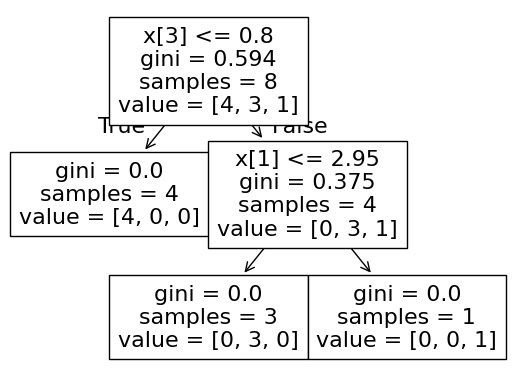

0.6


In [53]:
evaluate(bag_1,X,y)

In [54]:
df_bag = train_dataset.sample(8,replace=True)
X = df_bag.iloc[:,:-1]
y = df_bag.iloc[:,-1]
bag_2 = DecisionTreeClassifier()

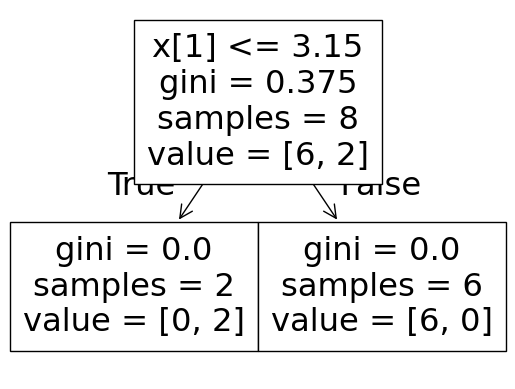

0.6


In [55]:
evaluate(bag_2,X,y)

In [56]:
df_bag = train_dataset.sample(8,replace=True)
X = df_bag.iloc[:,:-1]
y = df_bag.iloc[:,-1]
bag_3 = DecisionTreeClassifier()

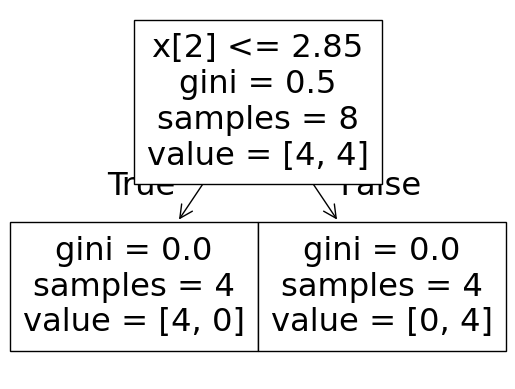

0.6


In [57]:
evaluate(bag_3,X,y)

In [58]:
test_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
88,5.6,3.0,4.1,1.3,1
144,6.7,3.3,5.7,2.5,2
66,5.6,3.0,4.5,1.5,1
102,7.1,3.0,5.9,2.1,2
51,6.4,3.2,4.5,1.5,1


In [59]:
print("Predictor 1",bag_1.predict(np.array([4.5,2.3,1.3,0.3]).reshape(1,4)))
print("Predictor 2",bag_2.predict(np.array([4.5,2.3,1.3,0.3]).reshape(1,4)))
print("Predictor 3",bag_3.predict(np.array([4.5,2.3,1.3,0.3]).reshape(1,4)))

Predictor 1 [0]
Predictor 2 [1]
Predictor 3 [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Pasting: Row Sampling without Replacement

In [60]:
train_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
59,5.2,2.7,3.9,1.4,1
145,6.7,3.0,5.2,2.3,2
67,5.8,2.7,4.1,1.0,1
63,6.1,2.9,4.7,1.4,1
8,4.4,2.9,1.4,0.2,0
11,4.8,3.4,1.6,0.2,0
22,4.6,3.6,1.0,0.2,0
74,6.4,2.9,4.3,1.3,1
43,5.0,3.5,1.6,0.6,0
17,5.1,3.5,1.4,0.3,0


In [61]:
train_dataset.sample(8)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
67,5.8,2.7,4.1,1.0,1
22,4.6,3.6,1.0,0.2,0
59,5.2,2.7,3.9,1.4,1
74,6.4,2.9,4.3,1.3,1
11,4.8,3.4,1.6,0.2,0
8,4.4,2.9,1.4,0.2,0
43,5.0,3.5,1.6,0.6,0
17,5.1,3.5,1.4,0.3,0


Random-subspace: Column Sampling

In [62]:
train_dataset.sample(2,axis=1)

,species,sepal width (cm)
59,1,2.7
145,2,3.0
67,1,2.7
63,1,2.9
8,0,2.9
11,0,3.4
22,0,3.6
74,1,2.9
43,0,3.5
17,0,3.5


Random-Patches: Row and Column Sampling

In [63]:
train_dataset.sample(8,axis=0).sample(2,axis=1)

,species,petal width (cm)
59,1,1.4
43,0,0.6
67,1,1.0
22,0,0.2
63,1,1.4
8,0,0.2
145,2,2.3
11,0,0.2
